# Machine Learning 3 - Support Vector Machines

A SVM classifier builds a set of hyper-planes to try and separate the data by maximizing the distance between the borders and the data points.

![SVM](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png "Decision border in an SVM")
![SVM](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png "Decision border in an SVM")

This separation is generally not possible to achieve in the original data space. Therefore, the first step of the SVM is to project the data into a high or infinite dimensions space in which this linear separation can be done. The projection can be done with linear, polynomial, or more commonly "RBF" kernels.

(800, 2)


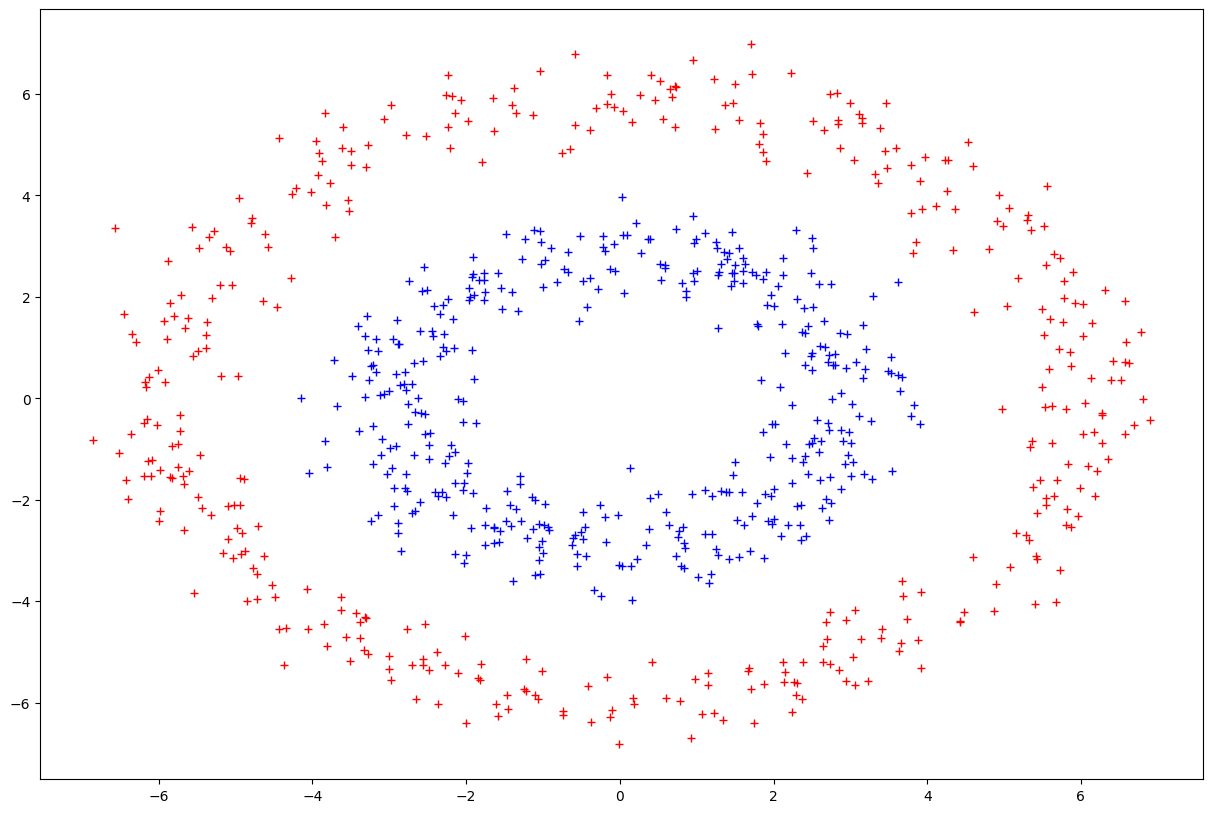

In [6]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours

n = 400

r1 = np.random.normal(3,0.5,size=(n,))
r2 = np.random.normal(6,0.5,size=(n,))

angles1 = np.random.random((n,))*2*np.pi
angles2 = np.random.random((n,))*2*np.pi

xs = np.array([r*np.cos(a) for r,a in zip(r1,angles1)]+[r*np.cos(a) for r,a in zip(r2,angles2)])
ys = np.array([r*np.sin(a) for r,a in zip(r1,angles1)]+[r*np.sin(a) for r,a in zip(r2,angles2)])
labs = np.array([0 for _ in r1]+[1 for _ in r2])

X = np.array([xs,ys]).T
print(X.shape)

plt.figure(figsize=(15,10))
plt.plot(X[labs==0, 0],X[labs==0, 1], "b+")
plt.plot(X[labs==1, 0],X[labs==1, 1], "r+")
plt.show()


1.0
(68, 2)


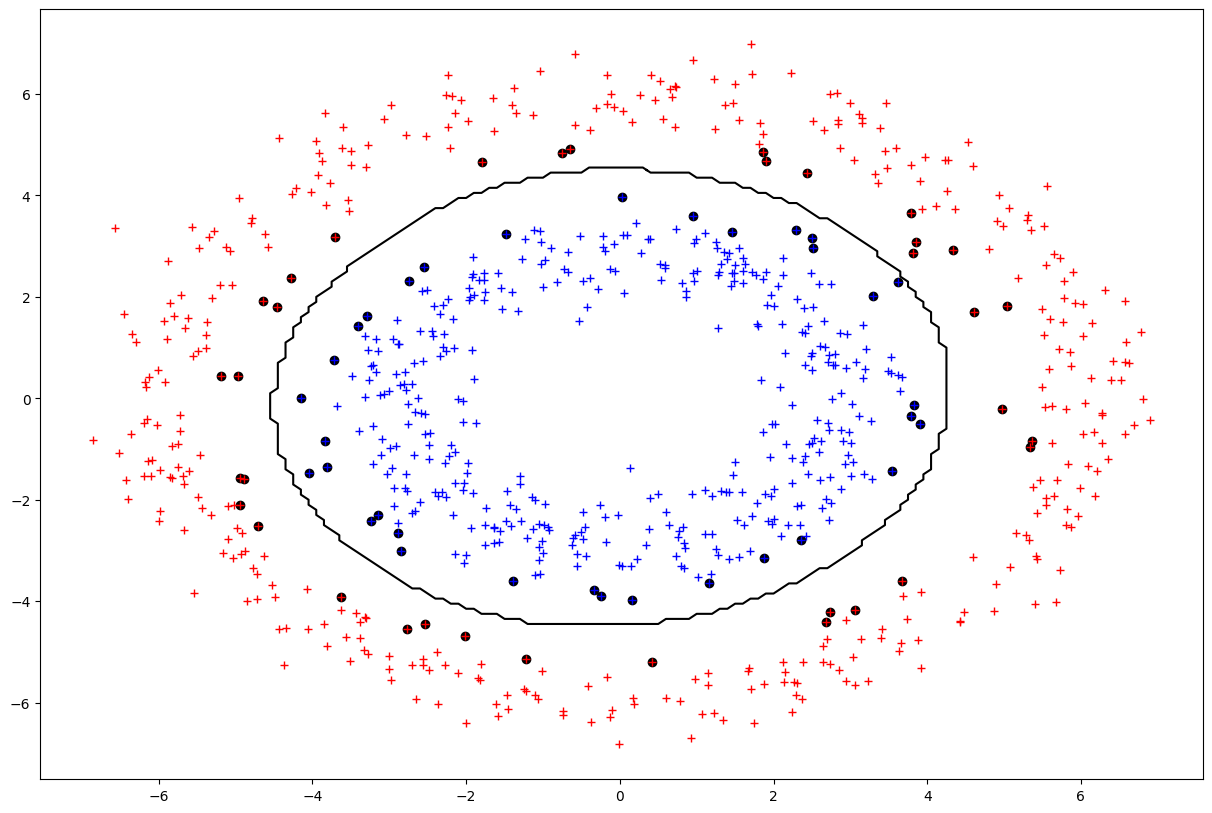

In [7]:
svc = SVC(C=1, gamma='scale')
svc.fit(X,labs)
p = svc.predict(X)
print((p==labs).sum()/len(p))
print(svc.support_vectors_.shape)

res = []
for x in np.arange(-8,8,0.1):
    row = []
    for y in np.arange(-8,8,0.1):
        row.append(svc.predict([[x,y]]))
    res.append(row)
res = np.array(res)

cont = ((find_contours(res[...,0])[0]/10)-8)
plt.figure(figsize=(15,10))
plt.plot(svc.support_vectors_[:,0],svc.support_vectors_[:,1],"ko")
plt.plot(X[labs==0, 0],X[labs==0, 1], "b+")
plt.plot(X[labs==1, 0],X[labs==1, 1], "r+")
plt.plot(cont[:,1],cont[:,0], "k-")
plt.show()

In [8]:
from lab_tools import CIFAR10

dataset = CIFAR10('../data/CIFAR10/CIFAR10/')

Pre-loading training data
Pre-loading test data


**Build a simple SVM** using [the SVC (Support Vector Classification) from sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). 
**Train** it on the CIFAR dataset.

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

svc = SVC()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc, dataset.train["hog"], dataset.train["labels"], cv=cv, scoring='accuracy')
print("Cross-validation mean accuracy : ", scores.mean())
svc.fit(dataset.train["hog"], dataset.train["labels"])
y_pred = svc.predict(dataset.test["hog"])
print("Accuracy on test set :",accuracy_score(y_pred,dataset.test["labels"]))

Cross-validation mean accuracy :  0.8130000000000001
Accuracy on test set : 0.822


Descriptive Performance Metrics
Cross-validation is done only on the training set
Accuracy from cross-validation : [0.80266667 0.811      0.821      0.80933333 0.821     ]
Cross-validation mean accuracy :  0.8130000000000001
Training set accuracy (cheating) :  0.915
Confusion Matrix (on training set) :
 [[4634  240  126]
 [ 214 4489  297]
 [  71  327 4602]]
Predictive Performance Metrics
Test set accuracy :  0.822
Confusion Matrix (on test set) :
 [[864 103  33]
 [124 762 114]
 [ 29 131 840]]
Classification report :
               precision    recall  f1-score   support

           0      0.850     0.864     0.857      1000
           1      0.765     0.762     0.764      1000
           2      0.851     0.840     0.845      1000

    accuracy                          0.822      3000
   macro avg      0.822     0.822     0.822      3000
weighted avg      0.822     0.822     0.822      3000

Learning Curve :


(0.8130000000000001,
 0.822,
 array([[864, 103,  33],
        [124, 762, 114],
        [ 29, 131, 840]]))

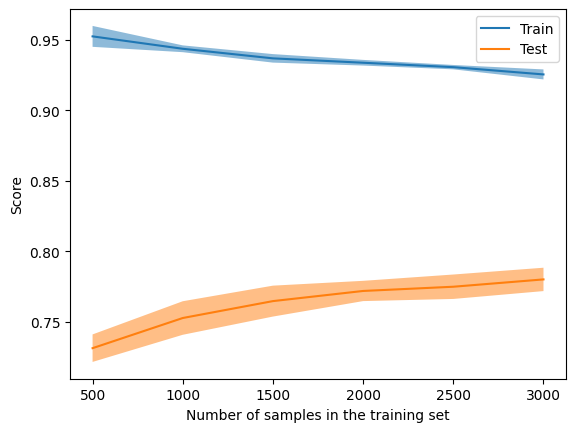

In [10]:
from lab_tools import ML_pipeline
svc = SVC()
ML_pipeline(svc,
            dataset.train["hog"],
            dataset.train["labels"],
            dataset.test["hog"],
            dataset.test["labels"],
            True)

**Explore the classifier**. How many support vectors are there? What are support vectors?
>support vectors are the data points that lie closest to the decision boundary (or hyperplane) in a Support Vector Machine (SVM) model. These points are critical because they define the position and orientation of the hyperplane.Mathematically, support vectors are the points for which the constraints of the SVM optimization problem are active, meaning they lie on or within the margin boundaries.

Each support vector has the same amount of dimensions than the dataset (for CIFAR10, it's 256)

In [11]:
all_support_vectors = svc.support_vectors_ #Each line = 1 "Support Vector" ; 1024 columns forming a 32x32 image 
vectors_per_class = svc.n_support_ #Number of "Support Vector" for each class

print(all_support_vectors.shape)
print(vectors_per_class)

(8675, 256)
[2704 3516 2455]


**Try to find the best "C" (error penalty) and "gamma" parameters** using cross-validation. What influence does "C" have on the number of support vectors?
>the parameter C in an SVM controls the trade-off between achieving a low error on the training data and maximizing the margin that separates the classes. Increasing C reduces the number of support vectors, while decreasing C increases the number of support vectors.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Cs = [0.1, 1, 10]
gammas = ["auto", "scale"]
cv = StratifiedKFold(5)

accuracys = []
for gamma in gammas:
    for C in Cs:
        svc = SVC(C=C,gamma=gamma)
        accuracy = cross_val_score(svc, dataset.train["hog"], dataset.train["labels"], cv=cv, scoring = "accuracy").mean()
        print(accuracy)
        accuracys.append(accuracy)

print(accuracys)

0.5968666666666668
0.5968666666666668
0.5968666666666668
0.7694
0.8125333333333333
0.8230666666666666
[0.5968666666666668, 0.5968666666666668, 0.5968666666666668, 0.7694, 0.8125333333333333, 0.8230666666666666]


AttributeError: 'SVC' object has no attribute 'support_vectors_'

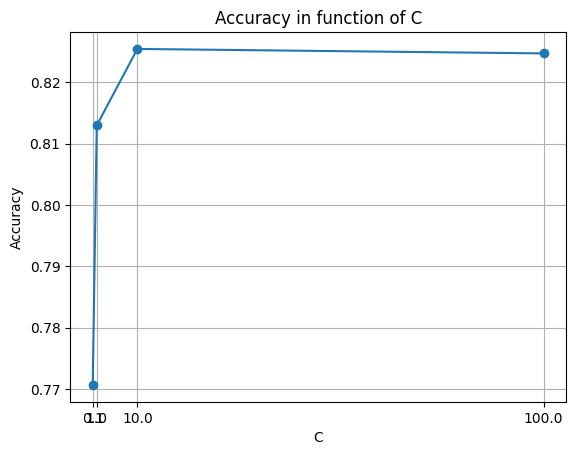

[0.7706666666666667,
 0.8130000000000001,
 0.8254666666666667,
 0.8247333333333333]

In [13]:
from lab_tools import evaluate_parameter
from sklearn.svm import SVC

evaluate_parameter(SVC,"C",[0.1,1,10,100],dataset.train["hog"],dataset.train["labels"])

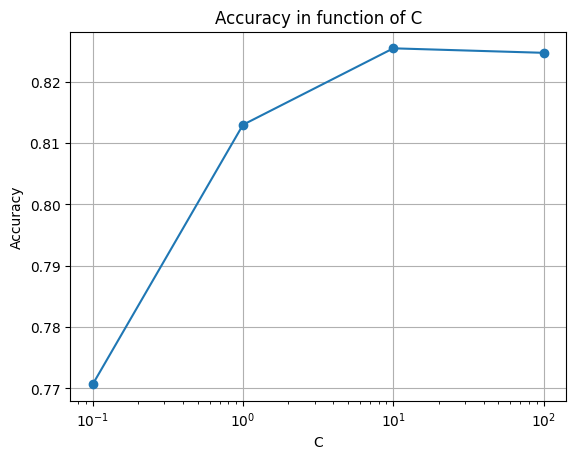

In [15]:
import matplotlib.pyplot as plt

# Values of C and corresponding accuracies
C_values = [0.1, 1, 10, 100]
accuracies = [0.7706666666666667, 0.8130000000000001, 0.8254666666666667, 0.8247333333333333]

# Plotting
plt.figure()
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy in function of C')
plt.grid(True)
plt.show()

Best params are gamma="scale" and C=5. This corresponds to the number of support vector being less important

In [ ]:
from sklearn.metrics import accuracy_score
#final testing
svc_final = SVC(C=10,gamma="scale")
svc_final.fit(dataset.train["hog"],dataset.train["labels"])
y_pred = svc_final.predict(dataset.test["hog"])
print("Accuracy on the test set :",accuracy_score(dataset.test["labels"],y_pred))


Accuracy on the test set : 0.83


# Comparing algorithms

Using the best hyper-parameters that you found for each of the algorithms (kNN, Decision Trees, Random Forests, MLP, SVM):

* Re-train the models on the full training set.
* Compare their results on the test set.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

kn_clf = KNeighborsClassifier(n_neighbors=5, weights="uniform")
tree_clf = DecisionTreeClassifier(max_depth = 8, min_samples_leaf= 1, min_samples_split= 10)
rf_clf = RandomForestClassifier(max_depth = 15, min_samples_split = 2, n_estimators = 140)
mlp_clf = MLPClassifier(hidden_layer_sizes=(128,64,32,), learning_rate="adaptive", early_stopping=True)
svc_clf = SVC(C=10, gamma='scale')

models = [kn_clf, tree_clf, rf_clf, mlp_clf, svc_clf]
cv = StratifiedKFold(5)

for model in models:
    model_name = type(model).__name__
    mean_cv = cross_val_score(model, dataset.train["hog"], dataset.train["labels"], cv=cv).mean()
    model.fit(dataset.train["hog"],dataset.train["labels"])
    y_pred = model.predict(dataset.test["hog"])
    cm = confusion_matrix(dataset.test["labels"], y_pred)
    # print("Confusion Matrix (on test set) :\n",cm)
    class_rep = classification_report(dataset.test["labels"], y_pred, digits=3, target_names=dataset.labels, output_dict=True)
    # print("Classification report :\n",class_rep)

    accuracy = class_rep["accuracy"]
    print(f"Cross-validation score {model_name}: {mean_cv:.3f}")
    print(f"Accuracy on test set {model_name}: {accuracy:.3f}")

    for clas in ["Airplane","Bird","Horse"]:
        print(f"Metrics for {model_name} (class {clas}): {class_rep[clas]}")



Cross-validation score KNeighborsClassifier: 0.710
Accuracy on test set KNeighborsClassifier: 0.722
Metrics for KNeighborsClassifier (class Airplane): {'precision': 0.894356005788712, 'recall': 0.618, 'f1-score': 0.7309284447072738, 'support': 1000.0}
Metrics for KNeighborsClassifier (class Bird): {'precision': 0.5998520710059172, 'recall': 0.811, 'f1-score': 0.689625850340136, 'support': 1000.0}
Metrics for KNeighborsClassifier (class Horse): {'precision': 0.7701149425287356, 'recall': 0.737, 'f1-score': 0.7531936637710782, 'support': 1000.0}
Cross-validation score DecisionTreeClassifier: 0.597
Accuracy on test set DecisionTreeClassifier: 0.598
Metrics for DecisionTreeClassifier (class Airplane): {'precision': 0.7129521586931156, 'recall': 0.611, 'f1-score': 0.658050619278406, 'support': 1000.0}
Metrics for DecisionTreeClassifier (class Bird): {'precision': 0.5060606060606061, 'recall': 0.668, 'f1-score': 0.5758620689655173, 'support': 1000.0}
Metrics for DecisionTreeClassifier (class